# Textual Explainability

In [1]:
import os, sys
from sys import platform
_base_path = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\' if platform == 'win32' else '/'.join(os.getcwd().split('/')[:-1]) + '/'
sys.path.append(_base_path)
import src.modules.plotting as plot
from src.helpers.utils import get_config
from src.modules.explainability import get_explanations

In [2]:
_config = get_config()
reports_path = os.path.join(_base_path, _config.get('REPORT_FOLDER'))
if platform == 'win32':
	reports_path = reports_path.replace('/', '\\')

Models used for textual explainability:

1. **BioMistral** (See the [model card](https://huggingface.co/BioMistral/BioMistral-7B) on HuggingFace community)

2. **Llama** (See the [model card](https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct) on HuggingFace community)

3. **Mistral** (See the [model card](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2) on HuggingFace community)

4. **Minerva** (See the [model card](https://huggingface.co/sapienzanlp/Minerva-3B-base-v1.0) on HuggingFace community)

5. **Llamantino** (See the [model card V2](https://huggingface.co/swap-uniba/LLaMAntino-2-chat-7b-hf-UltraChat-ITA) and [model card V3](https://huggingface.co/swap-uniba/LLaMAntino-3-ANITA-8B-Inst-DPO-ITA) on HuggingFace community)


In [3]:
plot.available_llms()

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

MODEL_KEY      MODEL_NAME               

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
biomistral     BioMistral-7B            
llama          Meta-Llama-3-8B-Instruct 
mistral        Mistral-7B-Instruct-v0.2 
minerva        Minerva-1B-base-v1.0     
llamantino2    LLaMAntino-2-chat-7b-hf-UltraChat-ITA
llamantino3    LLaMAntino-3-ANITA-8B-Inst-DPO-ITA


## **Report generation**

- Generate (and save) the medical report and all its computed metrics, by selecting:

	- the language (Italian or English);

	- the model (from those defined above);

	- the prompt's ID (type 1 or type 2).


**NOTES**:

1. For saving task `write_prompt_to_file` and `write_metrics_to_file` parameters must be set to `True`.

2. The prompts definition is set in `src/helpers/prompts.py` configuration file.

3. The prompts with their related output will be saved into `prompts/` folder, while the computed metrics will be saved into `reports/` folder.


In [4]:
## NOTE: uncomment to execute the LLM inference.

# output, metrics = get_explanations(
# 	lang = 'IT', 					# possible options are 'IT' or 'EN'
# 	model_key = 'llamantino3',		# possible options are shown above
# 	prompt_id = '2', 				# possible options are '1' or '2'
# 	sample_id = 'OAS30059_MR_d1188',# possible options are 'OAS30031_MR_d0427','OAS30059_MR_d0230','OAS30059_MR_d1188'
# 	output_length = 1024,
# 	write_prompt_to_file = False,
# 	write_metrics_to_file = True,
# 	base_path = _base_path,
# 	verbose = False
# )

## LLM evaluation

Bar charts showing the LLMs by number of params and inference times in descending order.

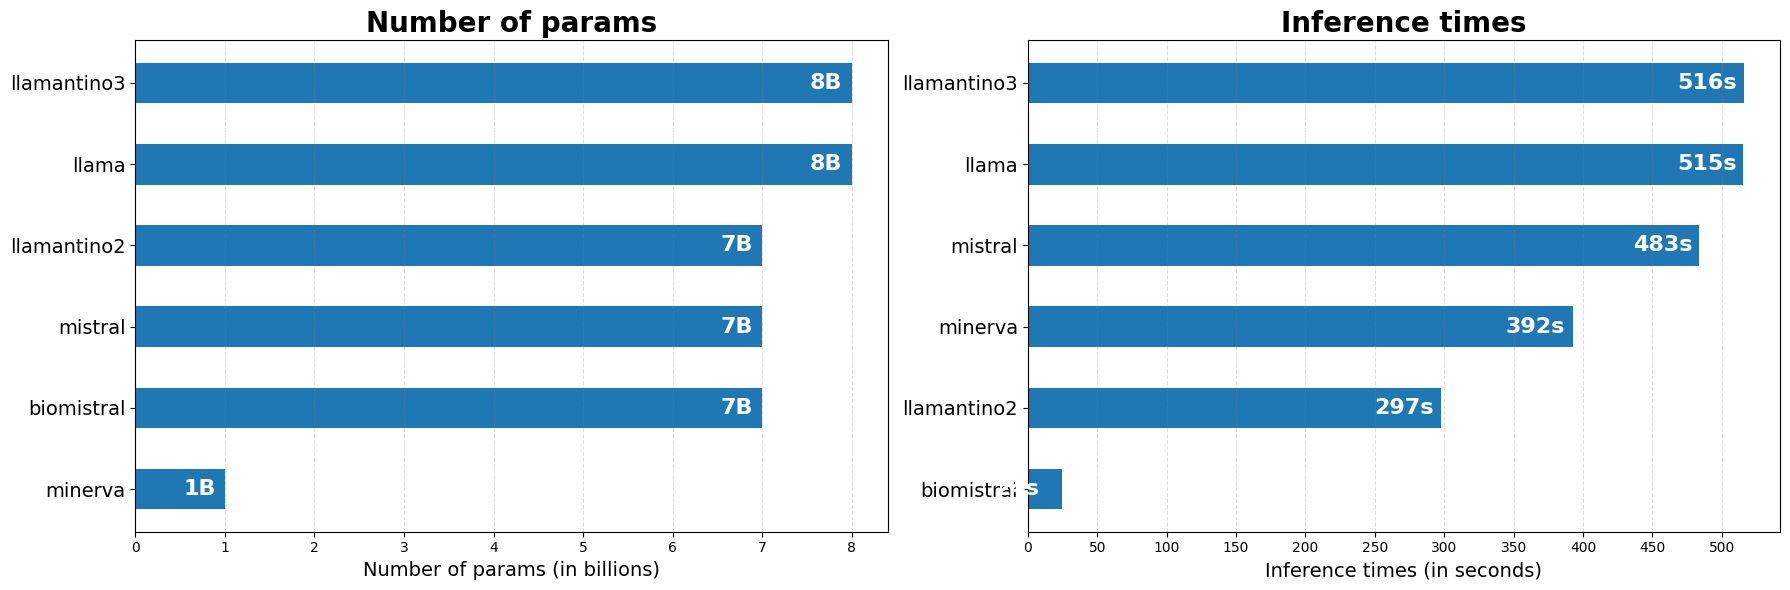

In [4]:
plot.llms_metrics(reports_path)

<br>

- Graphs showing the **diversity** of the LLMs output divided by language and prompt type.

**NOTES**:

1. **Type-token ratio (TTR)** is calculated as the number of unique words in a text (types) divided by the number of running words (tokens).

$$ TTR = {nTypes \over nTokens} $$

<br>

2. **Maas' index** is a more complex transformation of TTR that attempts to fit the value to a logarithmic curve.

$$ Maas = {\log{(nTokens)} - \log{(nTypes)} \over \log{(nTokens)}^2} $$

<br>


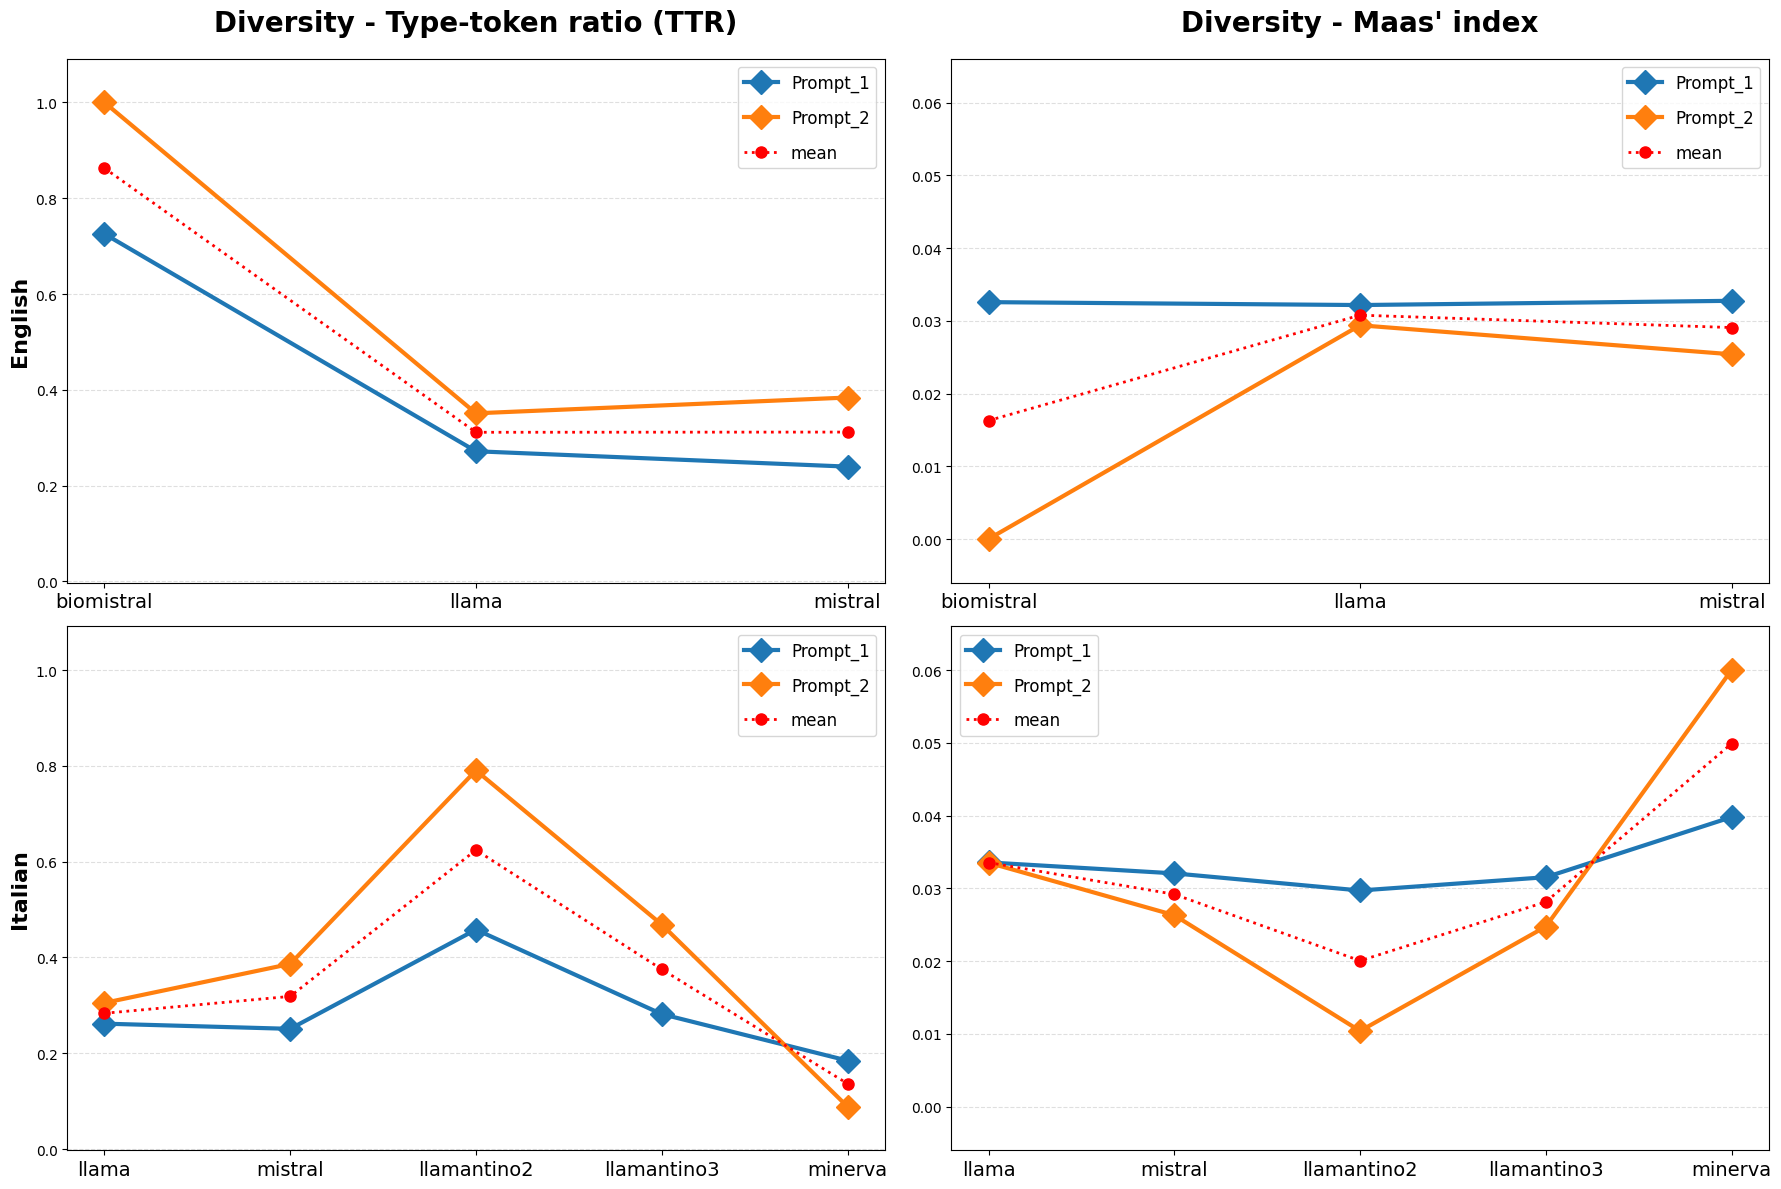

In [5]:
plot.llms_textual_metrics(
	metrics = ['diversity_TTR', 'diversity_MAAS'],
	titles = ['Diversity - Type-token ratio (TTR)', 'Diversity - Maas\' index'],
	report_path = reports_path
)

<br>

- Graphs showing the **readability** and **coherence** of the LLMs output divided by language and prompt type.


**NOTES**:

1. Readability score is calculated using the **Flesch reading ease test** for the English outputs.

$$ Flesch = {206.835 - 1.015 ({totalWords \over totalSentences}) - 84.6 ({totalSyllabes \over totalWords})} $$

<br>

2. For the Italian outputs readability score is calculated using the **Gulpease' index** specifically calibrated for Italian texts.

$$ Gulpease = {89 + {300 (totalSentences) - 10 (totalLetters) \over (totalWords)}} $$

<br>

3. **Coherence score**: a novel metric introduced for this thesis work. The definition of the formula is omitted to protect unpublished research.



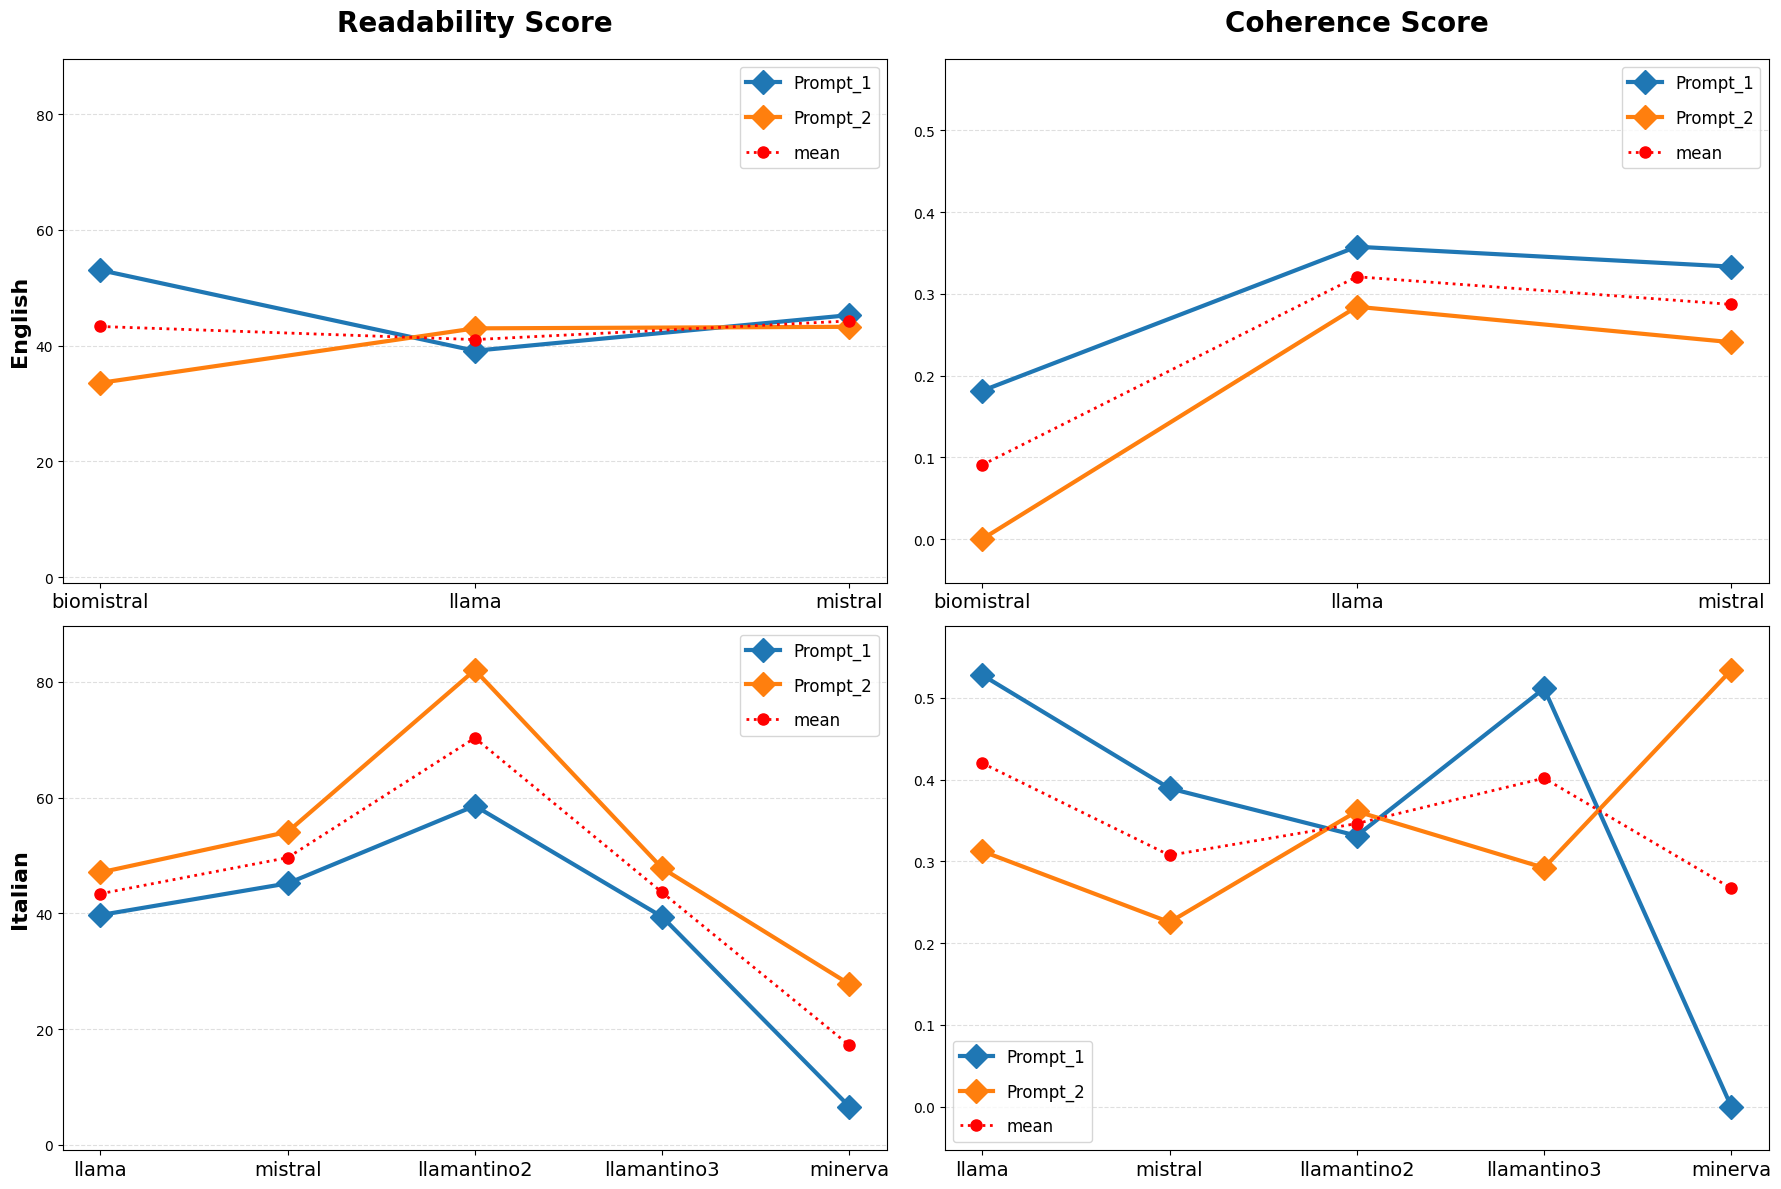

In [6]:
plot.llms_textual_metrics(
	metrics = ['readability_score', 'coherence_score'],
	titles = ['Readability Score', 'Coherence Score'],
	report_path = reports_path
)

Graphs showing the **coverage** between the LLMs output and the given prompt. Results are divided by language and prompt type.

**Metrics**:

1. **Embedding-based Coverage Score**: a novel metric introduced for this thesis work. The definition of the formula is omitted to protect unpublished research.

2. **Token-based Coverage Score**: a novel metric introduced for this thesis work. The definition of the formula is omitted to protect unpublished research.


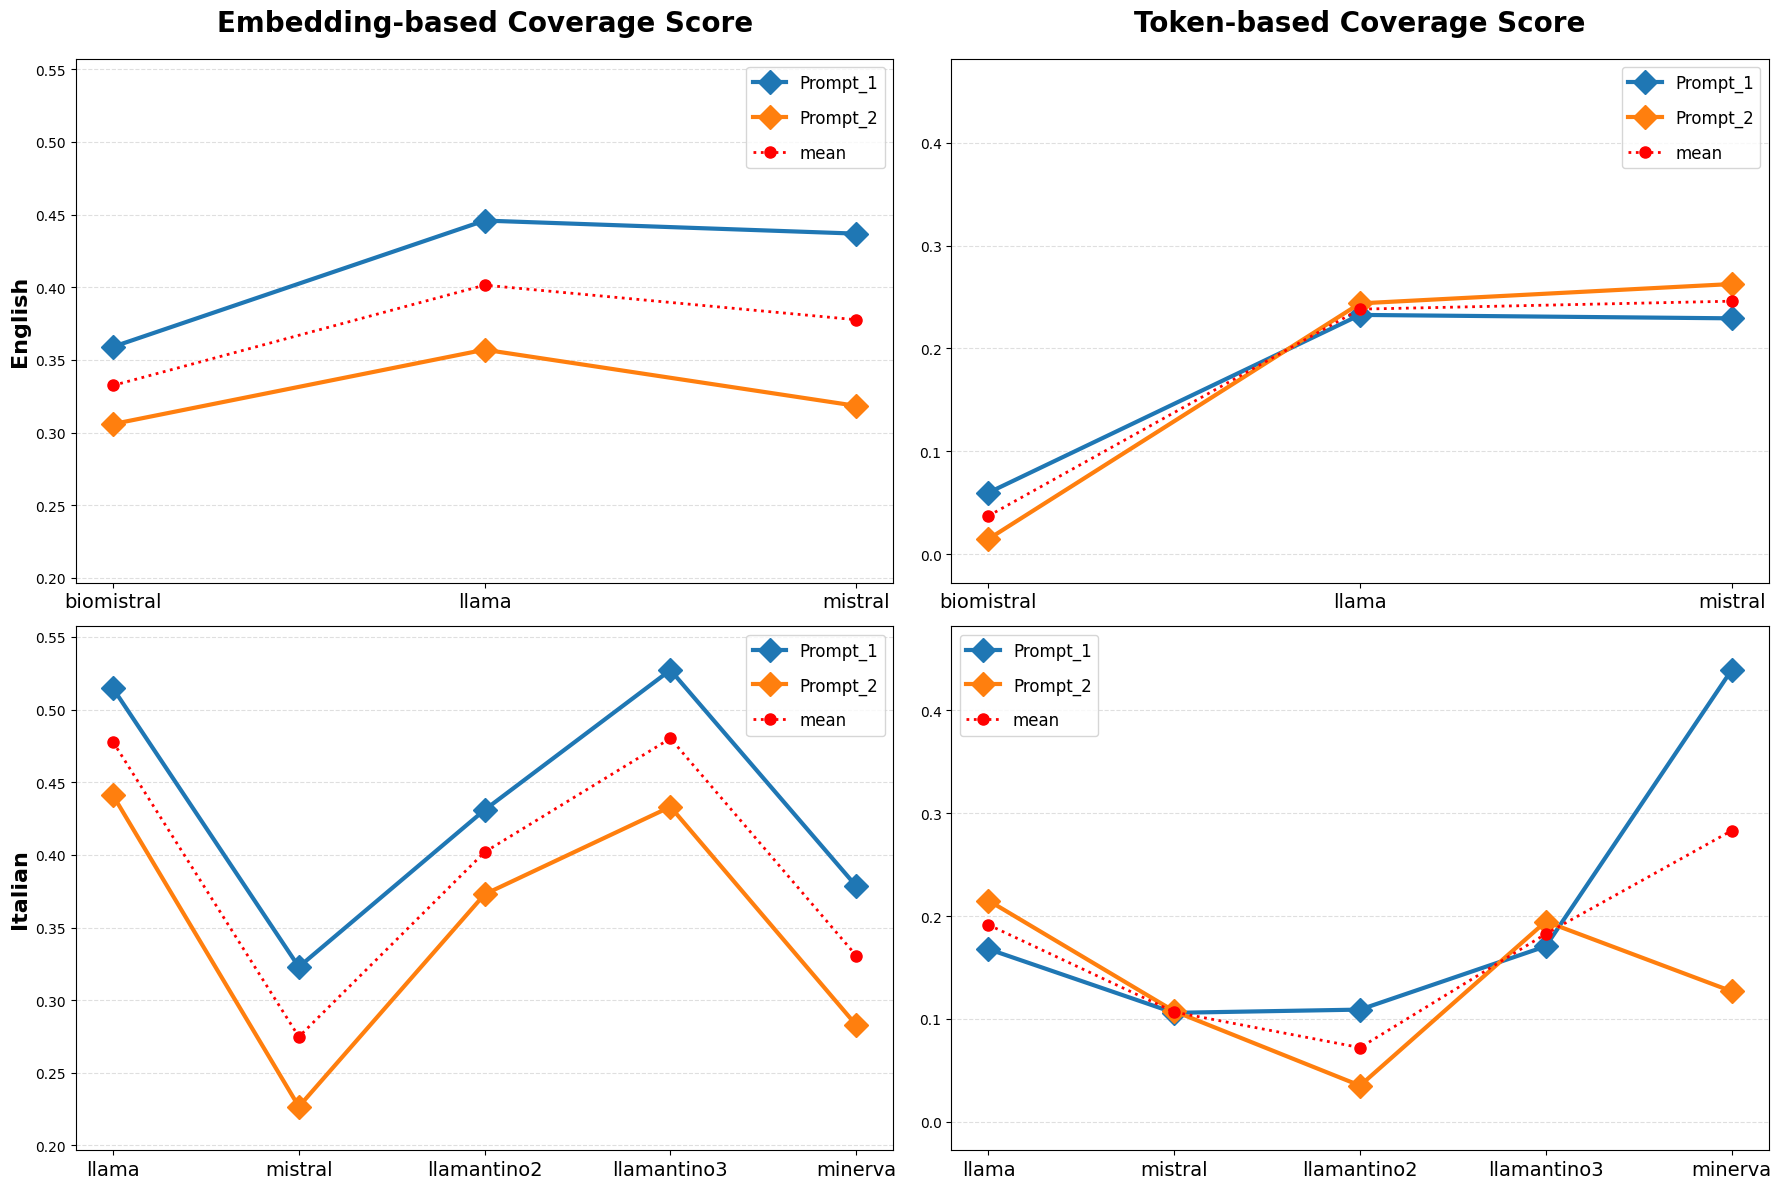

In [7]:
plot.llms_textual_metrics(
	metrics = ['coverage_embedding_based', 'coverage_token_based'],
	titles = ['Embedding-based Coverage Score', 'Token-based Coverage Score'],
	report_path = reports_path
)

- Printing the same computed metrics by averaging their values.

**NOTE:**

1. Add `lang='IT'` or `lang='EN'` for filtering data by language.

In [8]:
plot.llms_average_metrics(reports_path)

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

METRIC                      BIOMISTRAL         LLAMA       MISTRAL   LLAMANTINO2   LLAMANTINO3       MINERVA

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
diversity_TTR                     0.86           0.3          0.32          0.62          0.38          0.14
diversity_MAAS                    0.02          0.03          0.03          0.02          0.03          0.05
readability_score                43.32         42.22         46.95          70.3          43.6         17.18
coherence_score                   0.09          0.37           0.3          0.35           0.4          0.27
coverage_embedding_based          0.33          0.44          0.33           0.4          0.48          0.33
coverage_token_based              0.04          0.21          0.18          0.07          0.18          0.28
inference_tim